# 🦟 Malaria Outbreak Prediction using Machine Learning

This project uses a machine learning model (Random Forest) to predict **malaria outbreaks** based on climate and health data.  
It supports **SDG 3: Good Health and Well-being** by enabling early detection and intervention to save lives.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## 📥 Step 1: Load the Dataset

Make sure the file `climate_disease.csv` is available in the `data/` directory.


In [2]:
# Load the dataset
df = pd.read_csv('data/climate_disease.csv')  # Adjust the path if needed
df.head()


,year,month,country,region,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget
0,2000,1,Palestinian Territory,Central,28.132468,152.083870,110.487231,12.000000,53,145,113,1068
1,2000,2,Palestinian Territory,Central,30.886500,119.591418,83.467928,12.000000,132,48,113,1068
2,2000,3,Palestinian Territory,Central,31.366433,95.876124,93.095292,12.000000,34,80,113,1068
3,2000,4,Palestinian Territory,Central,28.481870,175.315731,105.530192,9.395894,23,133,113,1068
4,2000,5,Palestinian Territory,Central,26.890370,191.445990,60.205979,9.935726,39,74,113,1068


## 🧹 Step 2: Preprocess the Data

We’ll:
- Remove missing values
- Split the dataset into features and target
- Perform a train-test split


In [3]:
# Drop missing values
df = df.dropna()

# Confirm that the target column exists
if 'malaria_cases' not in df.columns:
    raise ValueError("Target column 'malaria_cases' not found in dataset. Please check the column names.")

# Define features and target
X = df.drop('malaria_cases', axis=1)
y = df['malaria_cases']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🤖 Step 3: Train the Random Forest Classifier

We use a Random Forest with 100 trees to train the model.


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])  # use same encoder for test set


# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 📈 Step 4: Predict and Evaluate the Model

We evaluate the model using:
- Accuracy
- Confusion Matrix
- Classification Report


In [5]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.06741898148148148

Confusion Matrix:
 [[436   2   0 ...   0   0   0]
 [  9   0   0 ...   0   0   0]
 [ 19   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.79      0.30       551
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        38
           7       0.00      0.00      0.00        32
           8       0.04      0.03      0.04        29
           9       0.00      0.00      0.00        26
          10       0.03      0.02      0.03        41
          11       0.00      0.00      0.00        28
          12       0.00      0

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

## 📊 Step 5: Feature Importance

Visualize which features most contribute to the malaria outbreak prediction.


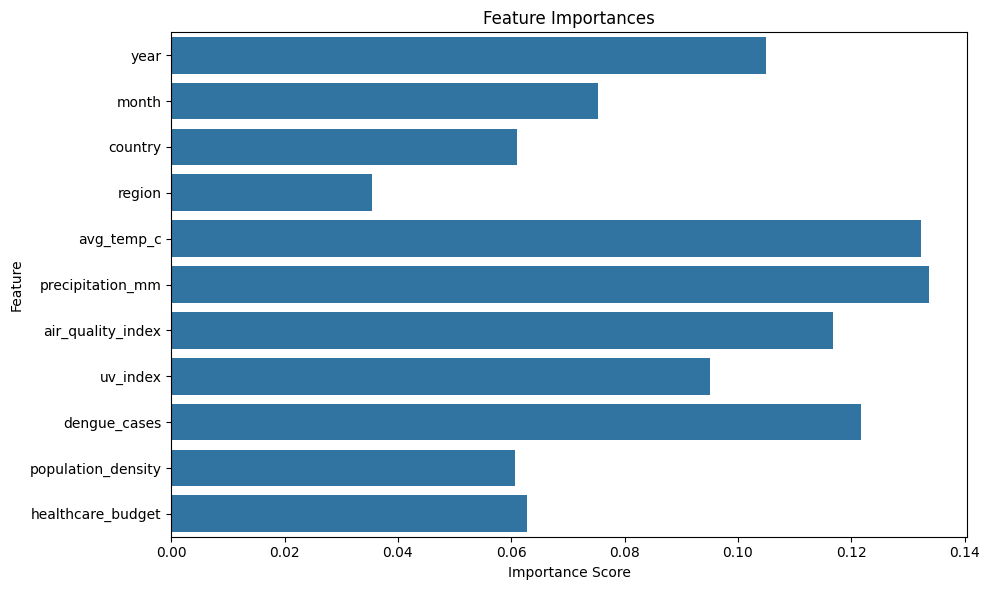

In [6]:
# Feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()


### 📉 Confusion Matrix & Classification Report

We evaluate the model’s performance using accuracy, precision, recall, and F1-score. The confusion matrix shows how well the model distinguishes between classes.


Accuracy: 0.06741898148148148

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.79      0.30       551
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        38
           7       0.00      0.00      0.00        32
           8       0.04      0.03      0.04        29
           9       0.00      0.00      0.00        26
          10       0.03      0.02      0.03        41
          11       0.00      0.00      0.00        28
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00        35
          16       0.00   

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

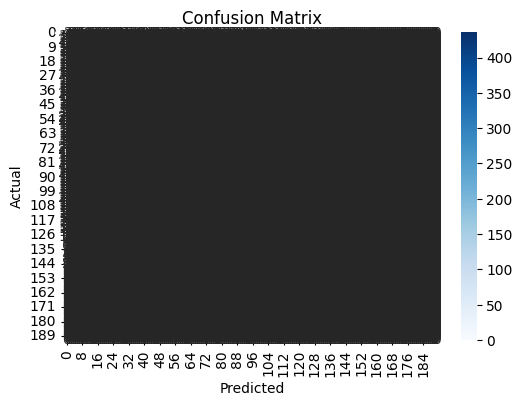

In [7]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 📈 Correlation Heatmap (Numeric Features Only)

We compute the correlation matrix using only numeric features, as correlation is undefined for categorical/text data like region names or country codes.


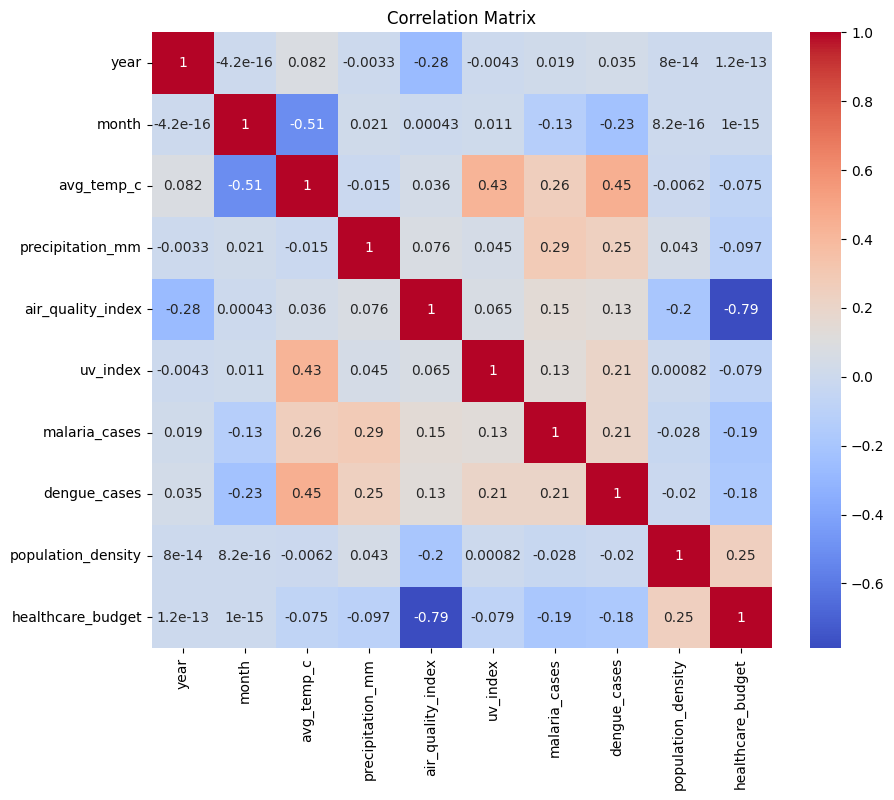

In [8]:
# Plot only numeric columns' correlation
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('correlation_heatmap.png')
plt.show()


### 🤖 Model Comparison

Let's compare Random Forest with a Logistic Regression model to evaluate if a simpler model performs similarly.


In [9]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

print("Random Forest Accuracy:", model.score(X_test, y_test))
print("Logistic Regression Accuracy:", log_model.score(X_test, y_test))


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.06741898148148148
Logistic Regression Accuracy: 0.08217592592592593


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.06741898148148148

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.79      0.30       551
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        38
           7       0.00      0.00      0.00        32
           8       0.04      0.03      0.04        29
           9       0.00      0.00      0.00        26
          10       0.03      0.02      0.03        41
          11       0.00      0.00      0.00        28
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00        35
          16       0.00   

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.06741898148148148

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.79      0.30       551
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        38
           7       0.00      0.00      0.00        32
           8       0.04      0.03      0.04        29
           9       0.00      0.00      0.00        26
          10       0.03      0.02      0.03        41
          11       0.00      0.00      0.00        28
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00        35
          16       0.00   

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

Accuracy: 0.06741898148148148

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.79      0.30       551
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        38
           7       0.00      0.00      0.00        32
           8       0.04      0.03      0.04        29
           9       0.00      0.00      0.00        26
          10       0.03      0.02      0.03        41
          11       0.00      0.00      0.00        28
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00        35
          16       0.00   

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

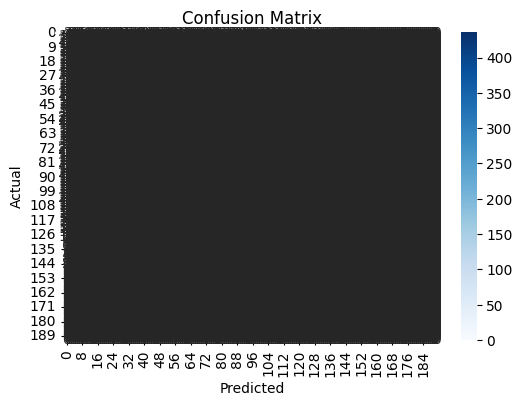

In [12]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy: 0.06741898148148148

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.79      0.30       551
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        38
           7       0.00      0.00      0.00        32
           8       0.04      0.03      0.04        29
           9       0.00      0.00      0.00        26
          10       0.03      0.02      0.03        41
          11       0.00      0.00      0.00        28
          12       0.00      0.00      0.00        40
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00        35
          16       0.00   

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(

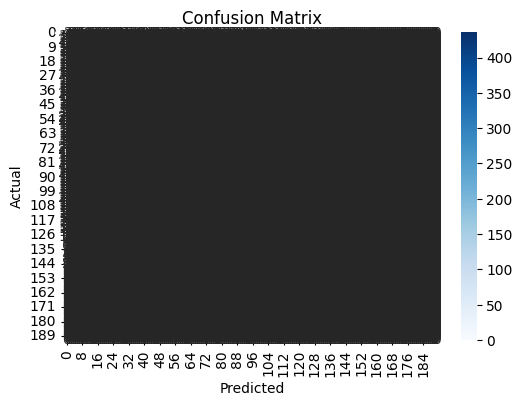

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 🧪 Cross-Validation

We use k-fold cross-validation to check how stable and generalizable our Random Forest model is.


In [10]:
# Drop non-numeric or non-relevant columns if needed
# Assume 'malaria_cases' is your target
y = df['malaria_cases']
X = df.drop('malaria_cases', axis=1)


# Convert string (categorical) columns into numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

# Now run cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_encoded, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.07016782 0.02141204 0.00998264 0.01244213 0.03096065]
Mean CV Score: 0.028993055555555553


### 🌍 Regional or Temporal Analysis (Optional)

If the dataset includes geographical or time-based columns like `region`, `country`, or `month`, we can analyze malaria trends across those dimensions.


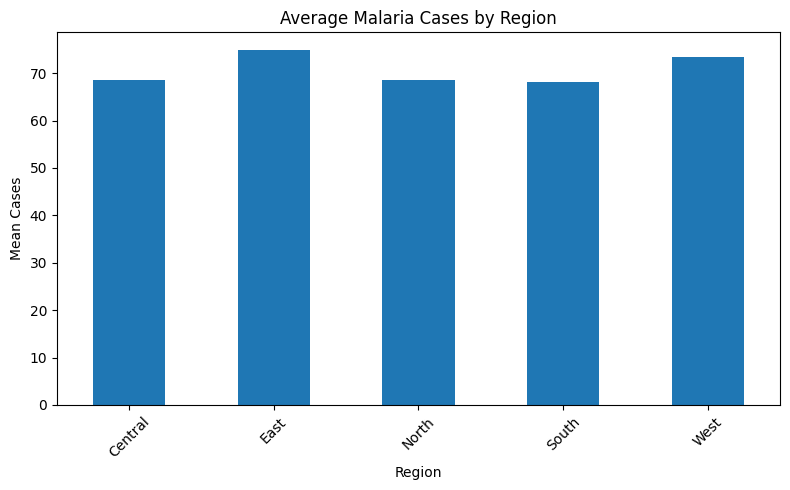

In [11]:
if 'region' in df.columns:
    df.groupby("region")["malaria_cases"].mean().plot(kind='bar', figsize=(8, 5))
    plt.title("Average Malaria Cases by Region")
    plt.ylabel("Mean Cases")
    plt.xlabel("Region")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('region_cases.png')
    plt.show()
